# Part II - Ford GoBike System Presentation
## by Olatunji Gabriel
### 23rd June, 2022

## Investigation Overview


The purpose of this presentation is to present my findings on the analysis of the Ford GoBike System. I investigated how i can encourage user that are not subscribers. At the end of my analysis, here is the summary of the insight i got from the data:

* It can be seen that mojority of the users are subscribers.
* Most of the bike users are male.
* Most of the bike users do not share their bike. Of all the 183411 users, only 17359 users share their bike.
* Most of the bike users were born between the year 1988 and 1998.
* The top five (5) most popular start stations are:
    * Market St at 10th St
    * San Francisco Caltrain Station 2 (Townsend St at 4th St)
    * Berry St at 4th St
    * Montgomery St BART Station (Market St at 2nd St)
    * Powell St BART Station (Market St at 4th St)
* The follow are the list of the top 5 least used stations:
    * 16th St Depot
    * 21st Ave at International Blvd
    * Palm St at Willow St
    * Parker Ave at McAllister St
    * Willow St at Vine St
* The most busiest period of time is 8 A.M and 5 P.M. Other busy times are 8 A.M, 9 A.M, 6 P.M and 7 P.M
* Average duration of all customer users of any gender is more than that of subscribed user.
* Most non subscribers tends to be active between 10 A.M and 4 P.M.


> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview

The Ford GoBike System data is a data of users (subscribers and customers) who uses he bike in the city of Florida. There are 16 features and 183412 observations of each users. The features are listed below:
*  duration_sec             
*  start_time               
*  end_time                 
*  start_station_id         
*  start_station_name    
*  start_station_latitude   
*  start_station_longitude 
*  end_station_id           
*  end_station_name     
*  end_station_latitude  
*  end_station_longitude    
*  bike_id             
*  user_type            
*  member_birth_year     
*  member_gender    
*  bike_share_for_all_trip

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv') 

In [3]:
# convert the start and end time to datetime 
time = ['start_time', 'end_time']
for t in time:
    df[t] = pd.to_datetime(df[t], format='%Y-%m-%d')
    
cat = ['user_type', 'member_gender', 'bike_share_for_all_trip']
for c in cat:
    df[c] = df[c].astype('category')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

The plot bellow shows the two types (Subscribers and Customers) of bike users in the dataset and their frequency. It can be seen that mojority of the users are subscribers.

In [4]:
def Univariate_viz(df, x_data, title, xlabel, ylabel):
    """
    Univariate plot of a varibale
    """
    plt.figure(figsize=(8, 5))
    palette = sns.color_palette()
    sns.countplot(data=df, x=x_data, color=palette[0])
    plt.title(title, loc='left')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # get the value count of each category
    user_type_count = df[x_data].value_counts()
    
    # get the xticks label and values
    locs, labs = plt.xticks()
    
    for loc, lab in list(zip(locs, labs)):
        user_count = user_type_count[lab.get_text()]  # height values for each user type
        if user_count < 30000:
            plt.text(loc, user_count+100, str(user_count), ha='center', color='black', size='16')
        else:
            plt.text(loc, user_count/2, str(user_count), ha='center', color='White', size='16')
    plt.show()


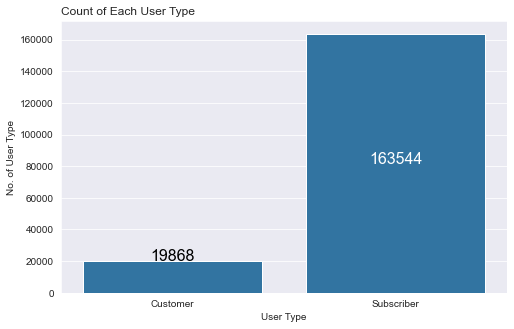

In [5]:
Univariate_viz(df, 'user_type', 'Count of Each User Type', "User Type", 'No. of User Type')

## (Visualization 2)

There are more male bike users than any other gender or user type. 

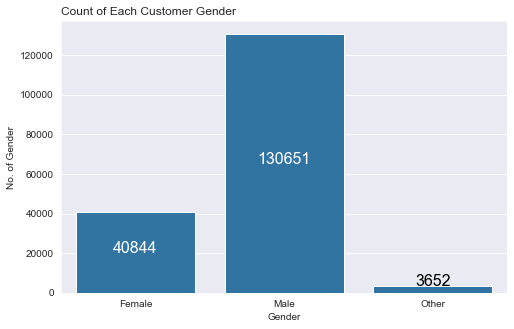

In [6]:
Univariate_viz(df, 'member_gender', 'Count of Each Customer Gender', "Gender", 'No. of Gender')

## (Visualization 3)

Trying to understand how often a particular genter user shares bike. From the barplot below, it can be seen that the number of bike users who share bikes are way smaller than those who do not share bike.

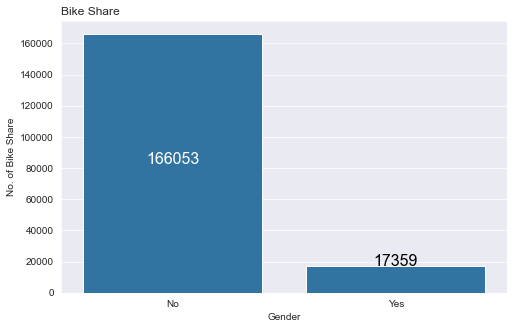

In [7]:
Univariate_viz(df, 'bike_share_for_all_trip', 'Bike Share', "Gender", 'No. of Bike Share')

## (Visualization 4)

The plot below shows that most of the bike users were born between the year 1988 and 1998.

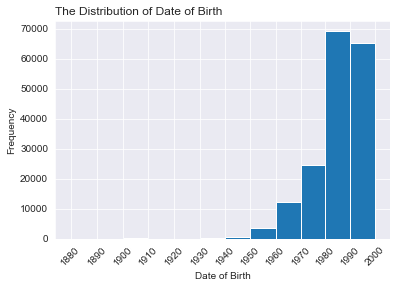

In [8]:
min_year = df['member_birth_year'].min()
max_year = df['member_birth_year'].max()

# bins = np.arange(min_year, max_year+10, 10)
bins = np.arange(1880, 2000+10, 10)

ax = plt.hist(data=df, x='member_birth_year', bins=bins);
# plt.xlim((min_year, max_year))
plt.xscale('log')
plt.title('The Distribution of Date of Birth', loc='left')
plt.xlabel('Date of Birth')
plt.ylabel('Frequency')

plt.xticks(bins, [str(x) for x in bins], rotation=45);

## (Visualization 5)

The top five (5) most popular start stations are:
* Market St at 10th St
* San Francisco Caltrain Station 2 (Townsend St at 4th St)
* Berry St at 4th St
* Montgomery St BART Station (Market St at 2nd St)
* Powell St BART Station (Market St at 4th St)

In [9]:
station_name = df['start_station_name'].value_counts().reset_index(
    name='Freq').rename({'index':'Station'}, axis=1)

top_5 = station_name.sort_values('Freq', ascending=False).iloc[:5]

top_5

,Station,Freq
0,Market St at 10th St,3904
1,San Francisco Caltrain Station 2 (Townsend St...,3544
2,Berry St at 4th St,3052
3,Montgomery St BART Station (Market St at 2nd St),2895
4,Powell St BART Station (Market St at 4th St),2760


Text(0.5, 0, 'No. of Usage')

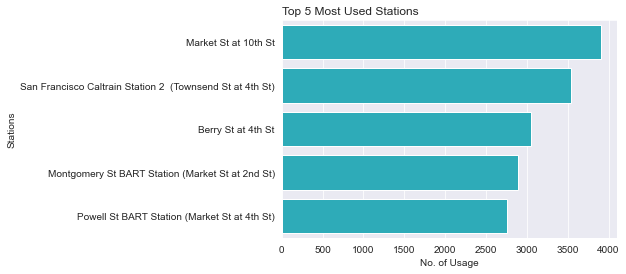

In [10]:
sns.barplot(y=top_5['Station'], x=top_5['Freq'], color=sns.color_palette()[-1])
plt.title("Top 5 Most Used Stations", loc='left')
plt.ylabel('Stations')
plt.xlabel('No. of Usage')

## (Visualization 6)

The follow are the list of the top 5 least used stations:
* 16th St Depot
* 21st Ave at International Blvd
* Palm St at Willow St
* Parker Ave at McAllister St
* Willow St at Vine St

In [11]:
least_5 = station_name.sort_values('Freq').reset_index(drop=True).loc[:4]

least_5

,Station,Freq
0,16th St Depot,2
1,21st Ave at International Blvd,4
2,Palm St at Willow St,4
3,Parker Ave at McAllister St,7
4,Willow St at Vine St,9


Text(0.5, 0, 'No. of Usage')

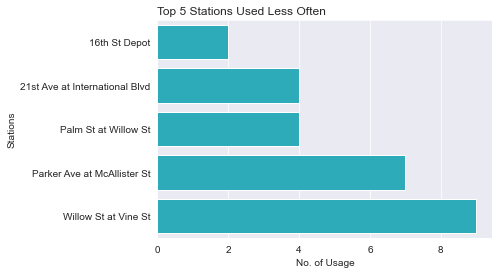

In [12]:
sns.barplot(y=least_5['Station'], x=least_5['Freq'], color=sns.color_palette()[-1])
plt.title("Top 5 Stations Used Less Often", loc='left')
plt.ylabel('Stations')
plt.xlabel('No. of Usage')

## (Visualization 7)

The plot below shows the frequency of the starting time (hour) of each bike.

In [13]:
df['hour'] = df['start_time'].dt.hour

Text(0.5, 0, 'No. of Users')

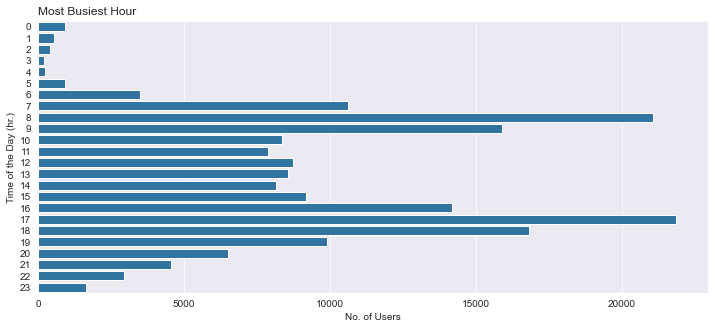

In [14]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, y='hour', color=sns.color_palette()[0])
plt.title('Most Busiest Hour', loc='left')
plt.ylabel("Time of the Day (hr.)")
plt.xlabel("No. of Users")
# Univariate_viz(df, 'user_type', 'Count of Each User Type', "User Type", 'No. of User Type')

## (Visualization 8)

I was identified that the average duration of journey for female and other gender is more than male.

In [15]:
stats = df['duration_sec'].describe().reset_index().rename({'index':'stats'}, axis=1).set_index('stats')
whisker_length = 796 + (1.5*(stats.loc['75%', 'duration_sec']-stats.loc['25%', 'duration_sec']))
df['handled_duration'] = df['duration_sec'].apply(lambda x: whisker_length if x > whisker_length else x)

In [16]:
def bat_plt(df, x, y, title, xlabel, ylabel):
    palette = sns.color_palette()[-1]
    sns.barplot(data=df, x=x, y=y, color=palette)
    plt.title(title, loc='left')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

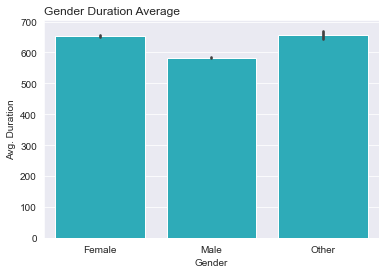

In [17]:
bat_plt(df, 'member_gender', 'handled_duration', 'Gender Duration Average', 'Gender', 'Avg. Duration')

### (Visualization 9)

Average duration of all customer users of any gender is more than that of subscribed user.

Text(0, 0.5, 'Average Duration')

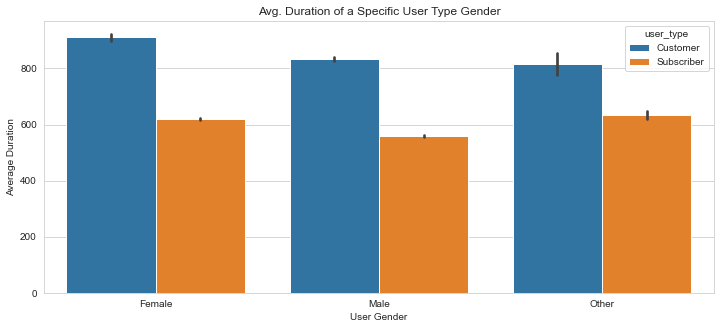

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='member_gender', y='handled_duration', hue='user_type')
plt.title('Avg. Duration of a Specific User Type Gender')
plt.xlabel('User Gender')
plt.ylabel('Average Duration')

## (Visualization 10)

Most non subscribers tends to be active between 10 A.M and 4 P.M.

Text(0, 0.5, 'Active Time (Hr)')

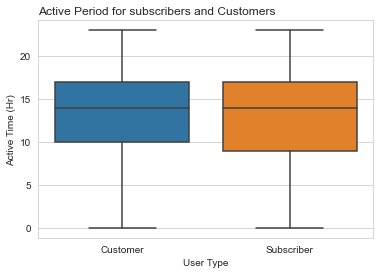

In [19]:
sns.boxplot(data=df, x='user_type', y='hour')
plt.title('Active Period for subscribers and Customers', loc='left')
plt.xlabel('User Type')
plt.ylabel('Active Time (Hr)')

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

# Thank You!